In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv(r"C:\Users\chavs\Downloads\Bases de datos del curso\fifa_eda.csv")

In [ ]:
print("Primeras 20 filas:")
print(df.head(20))

Primeras 20 filas:
        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
1

In [23]:
print("Últimas 5 filas:")
print(df.tail(5))

Últimas 5 filas:
           ID                Name  Age Nationality  Overall  Potential  \
18202  238813        J. Lundstram   19     England       47         65   
18203  243165  N. Christoffersson   19      Sweden       47         63   
18204  241638           B. Worman   16     England       47         67   
18205  246268      D. Walker-Rice   17     England       47         66   
18206  246269           G. Nugent   16     England       46         66   

                   Club  Value  Wage Preferred Foot  International Reputation  \
18202   Crewe Alexandra   60.0   1.0          Right                       1.0   
18203    Trelleborgs FF   60.0   1.0          Right                       1.0   
18204  Cambridge United   60.0   1.0          Right                       1.0   
18205   Tranmere Rovers   60.0   1.0          Right                       1.0   
18206   Tranmere Rovers   60.0   1.0          Right                       1.0   

       Skill Moves Position  Joined Contract Valid 

In [24]:
print("Muestra aleatoria de 10 filas:")
print(df.sample(10))

Muestra aleatoria de 10 filas:
           ID            Name  Age     Nationality  Overall  Potential  \
15198  197597       F. Musaev   29      Uzbekistan       60         60   
11286  221763        Kim Shin   23  Korea Republic       64         69   
994    137809     Vágner Love   34          Brazil       77         77   
2588   222457       B. Mensah   23           Ghana       74         81   
14841  242763        J. Ortíz   19        Colombia       60         74   
3023   200111    R. van Rhijn   27     Netherlands       73         74   
3334   212261  Brandon Thomas   23           Spain       72         79   
7277   238497    M. Spielmann   22     Switzerland       68         79   
8484   223424         I. Depe   25          Turkey       67         68   
16600  232402     Kim Woo Suk   21  Korea Republic       57         68   

                  Club   Value  Wage Preferred Foot  International Reputation  \
15198     Júbilo Iwata   200.0   1.0          Right                      

In [26]:
print("Estadísticas descriptivas:")
print(df.describe())
print("\nTipos de datos:")
print(df.dtypes)

Estadísticas descriptivas:
                  ID           Age       Overall     Potential          Value  \
count   18207.000000  18207.000000  18207.000000  18207.000000   17955.000000   
mean   214298.338606     25.122206     66.238699     71.307299    2444.530214   
std     29965.244204      4.669943      6.908930      6.136496    5626.715434   
min        16.000000     16.000000     46.000000     48.000000      10.000000   
25%    200315.500000     21.000000     62.000000     67.000000     325.000000   
50%    221759.000000     25.000000     66.000000     71.000000     700.000000   
75%    236529.500000     28.000000     71.000000     75.000000    2100.000000   
max    246620.000000     45.000000     94.000000     95.000000  118500.000000   

               Wage  International Reputation   Skill Moves        Joined  \
count  18207.000000              18159.000000  18159.000000  18207.000000   
mean       9.731312                  1.113222      2.361308   2016.420607   
std       21

In [ ]:
cols_to_convert = ['Value', 'Wage']  
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('K', 'e3').replace('M', 'e6')
        try:
            return float(eval(value))
        except:
            return None
    return value

df['Value'] = df['Value'].apply(convert_to_numeric)
df['Wage'] = df['Wage'].apply(convert_to_numeric)


In [27]:
print("Estadísticas descriptivas después de conversión:")
print(df.describe())

Estadísticas descriptivas después de conversión:
                  ID           Age       Overall     Potential          Value  \
count   18207.000000  18207.000000  18207.000000  18207.000000   17955.000000   
mean   214298.338606     25.122206     66.238699     71.307299    2444.530214   
std     29965.244204      4.669943      6.908930      6.136496    5626.715434   
min        16.000000     16.000000     46.000000     48.000000      10.000000   
25%    200315.500000     21.000000     62.000000     67.000000     325.000000   
50%    221759.000000     25.000000     66.000000     71.000000     700.000000   
75%    236529.500000     28.000000     71.000000     75.000000    2100.000000   
max    246620.000000     45.000000     94.000000     95.000000  118500.000000   

               Wage  International Reputation   Skill Moves        Joined  \
count  18207.000000              18159.000000  18159.000000  18207.000000   
mean       9.731312                  1.113222      2.361308   2016.

In [28]:
current_year = datetime.now().year
df['Joined'] = pd.to_numeric(df['Joined'], errors='coerce')
df['Years Playing'] = current_year - df['Joined']
print("Primeras filas con 'Years Playing':")
print(df[['Joined', 'Years Playing']].head())

Primeras filas con 'Years Playing':
   Joined  Years Playing
0    2004             21
1    2018              7
2    2017              8
3    2011             14
4    2015             10


In [29]:
mexico_players = df[df['Nationality'] == 'Mexico']
print("Jugadores de México:")
print(mexico_players)

Jugadores de México:
           ID          Name  Age Nationality  Overall  Potential  \
306    171897   A. Guardado   31      Mexico       82         82   
329    221992     H. Lozano   22      Mexico       81         86   
371    193165     J. Corona   25      Mexico       81         83   
397    169416       C. Vela   29      Mexico       81         81   
406    156519    H. Herrera   28      Mexico       81         81   
...       ...           ...  ...         ...      ...        ...   
17373  244828  R. Gutiérrez   22      Mexico       54         64   
17614  239739      A. Ocejo   20      Mexico       53         62   
18037  246089      C. Landa   19      Mexico       50         60   
18068  240286     J. García   20      Mexico       50         62   
18113  237045    R. Pasquel   22      Mexico       50         60   

                              Club    Value  Wage Preferred Foot  \
306                     Real Betis  19000.0  35.0           Left   
329                       

In [30]:
print("Ordenados por Release Clause:")
df['Release Clause'] = df['Release Clause'].apply(convert_to_numeric)
df_sorted = df.sort_values(by='Release Clause', ascending=False)
print(df_sorted)

Ordenados por Release Clause:
           ID              Name  Age Nationality  Overall  Potential  \
2      190871         Neymar Jr   26      Brazil       92         93   
0      158023          L. Messi   31   Argentina       94         94   
4      192985      K. De Bruyne   27     Belgium       91         92   
5      183277         E. Hazard   27     Belgium       91         91   
25     231747         K. Mbappé   19      France       88         95   
...       ...               ...  ...         ...      ...        ...   
16204  176860        C. Månsson   37      Sweden       58         58   
17209  237751        Y. Nishibe   37       Japan       55         55   
16565  232893       K. Kitamoto   36       Japan       57         57   
16249  176631       B. Lekström   37      Sweden       58         58   
16628  102881  K. Stamatopoulos   38      Canada       57         57   

                      Club     Value   Wage Preferred Foot  \
2      Paris Saint-Germain  118500.0  290.0

In [31]:
players_per_year = df.groupby('Joined').size().reset_index(name='PlayerCount')
print("Número de jugadores por año:")
print(players_per_year)

Número de jugadores por año:
    Joined  PlayerCount
0     1991            1
1     1998            3
2     1999            1
3     2000            2
4     2001            2
5     2002           10
6     2003           13
7     2004           12
8     2005           17
9     2006           18
10    2007           38
11    2008           53
12    2009           78
13    2010          131
14    2011          201
15    2012          340
16    2013          458
17    2014          818
18    2015         1336
19    2016         3799
20    2017         4307
21    2018         6569


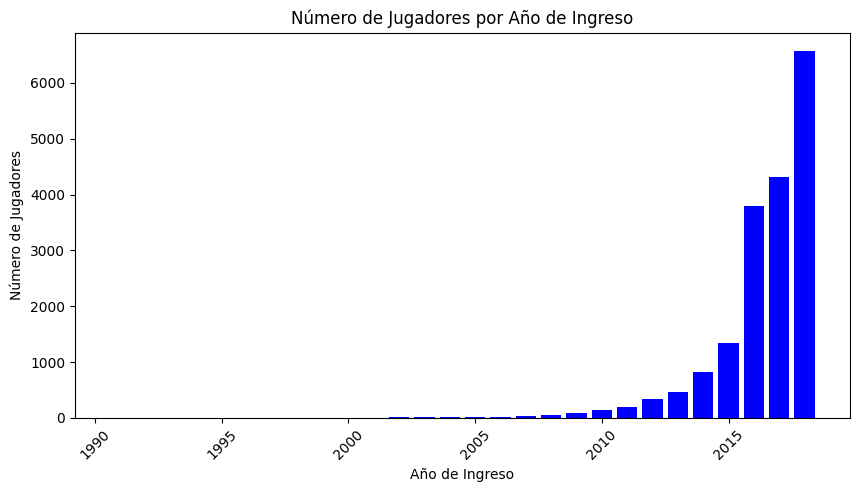

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(players_per_year['Joined'], players_per_year['PlayerCount'], color='blue')
plt.xlabel('Año de Ingreso')
plt.ylabel('Número de Jugadores')
plt.title('Número de Jugadores por Año de Ingreso')
plt.xticks(rotation=45)
plt.show()